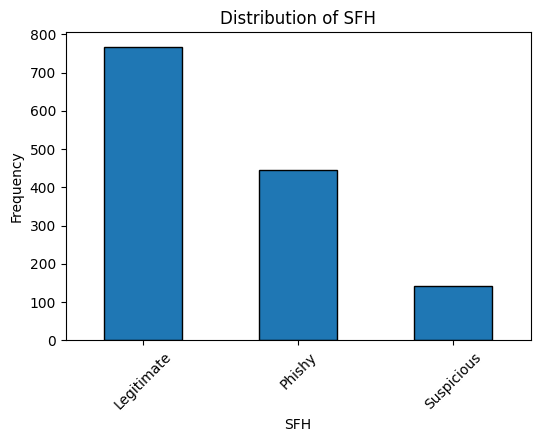

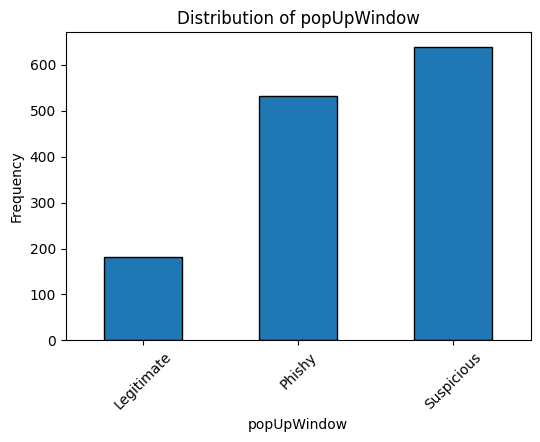

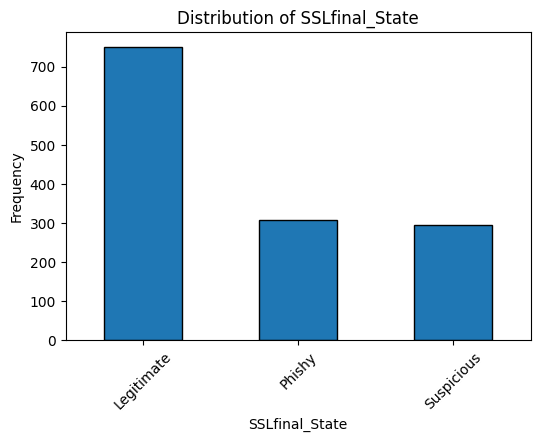

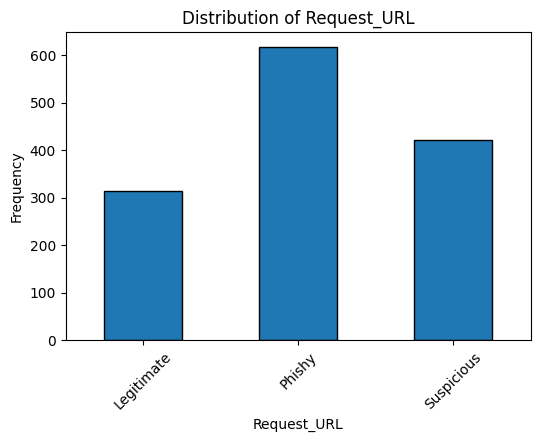

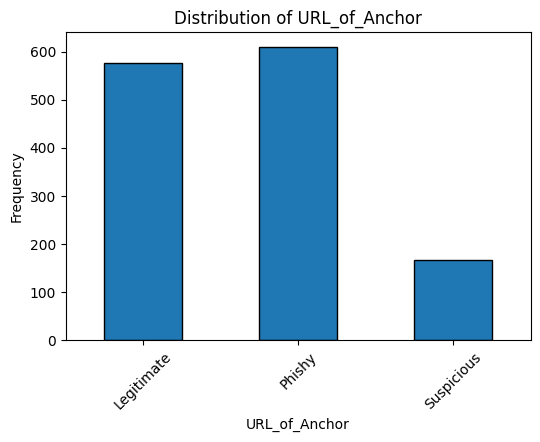

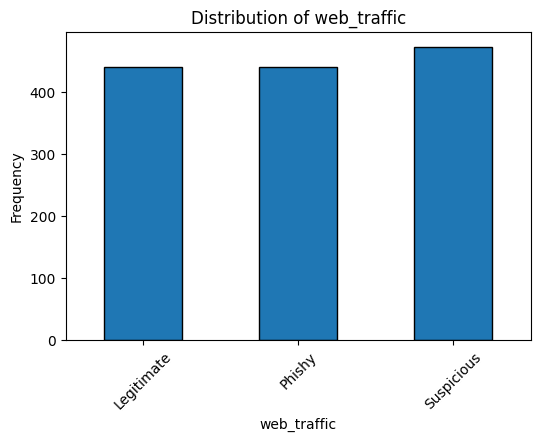

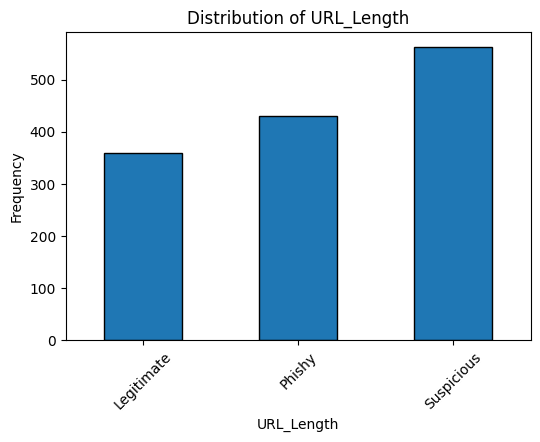

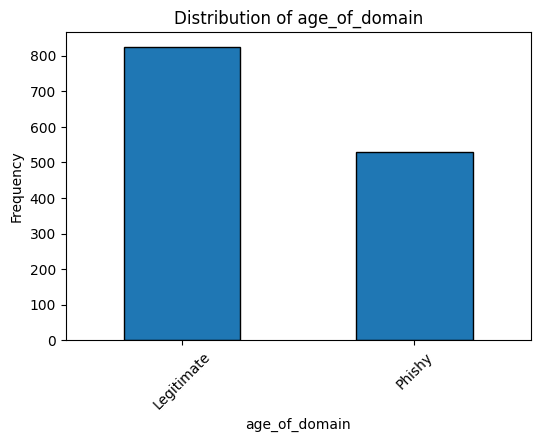

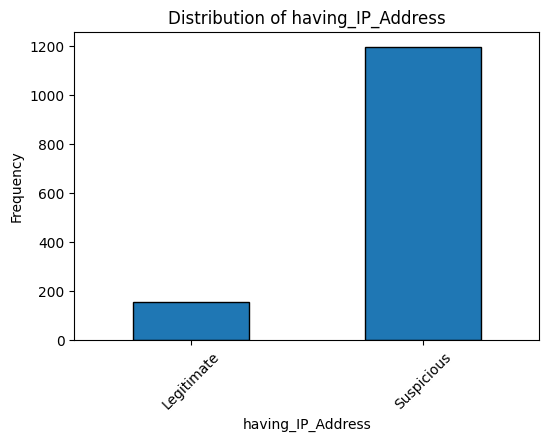

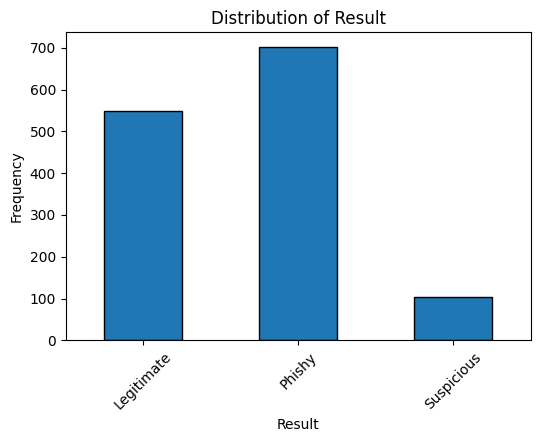


Mean:
SFH                  0.237990
popUpWindow         -0.258684
SSLfinal_State       0.327421
Request_URL         -0.223208
URL_of_Anchor       -0.025129
web_traffic          0.000000
URL_Length          -0.053215
age_of_domain        0.219512
having_IP_Address    0.114560
Result              -0.113821
dtype: float64

Median:
SFH                  1.0
popUpWindow          0.0
SSLfinal_State       1.0
Request_URL          0.0
URL_of_Anchor        0.0
web_traffic          0.0
URL_Length           0.0
age_of_domain        1.0
having_IP_Address    0.0
Result              -1.0
dtype: float64

Standard Deviation:
SFH                  0.916389
popUpWindow          0.679072
SSLfinal_State       0.822193
Request_URL          0.799682
URL_of_Anchor        0.936262
web_traffic          0.806776
URL_Length           0.762552
age_of_domain        0.975970
having_IP_Address    0.318608
Result               0.954773
dtype: float64


In [ ]:
#Task 1
#Data preprocessing
#Visualizing values for each feature and calculating the mean, median, standard deviation

!pip install ucimlrepo
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random

from ucimlrepo import fetch_ucirepo

# fetch dataset
website_phishing = fetch_ucirepo(id=379)

# data (as pandas dataframes)
featuresDF = website_phishing.data.features
targetDF = website_phishing.data.targets

X = featuresDF.values
y= targetDF.values
column_labels = featuresDF.columns.to_list() + targetDF.columns.to_list()

#Combine features and targets for visualization
combined_df = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))), columns=column_labels)

# Mapping numeric values to labels for visualization
value_mapping = {1: "Legitimate", 0: "Suspicious", -1: "Phishy"}
labeled_df = combined_df.copy()
for column in labeled_df.columns:
    labeled_df[column] = labeled_df[column].map(value_mapping)

# Creating histograms with the new labels
for column in labeled_df.columns:
    plt.figure(figsize=(6, 4))
    labeled_df[column].value_counts().sort_index().plot(kind='bar', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Calculating mean, median, and standard deviation for the data
mean = combined_df.mean()
median = combined_df.median()
std = combined_df.std()
print("\nMean:")
print(mean)
print("\nMedian:")
print(median)
print("\nStandard Deviation:")
print(std)


Epoch 1/10, Last Batch Validation Accuracy: 81.92%
Epoch 2/10, Last Batch Validation Accuracy: 81.55%
Epoch 3/10, Last Batch Validation Accuracy: 81.55%
Epoch 4/10, Last Batch Validation Accuracy: 81.55%
Epoch 5/10, Last Batch Validation Accuracy: 81.55%
Epoch 6/10, Last Batch Validation Accuracy: 82.29%
Epoch 7/10, Last Batch Validation Accuracy: 81.92%
Epoch 8/10, Last Batch Validation Accuracy: 81.55%
Epoch 9/10, Last Batch Validation Accuracy: 81.18%
Epoch 10/10, Last Batch Validation Accuracy: 81.18%


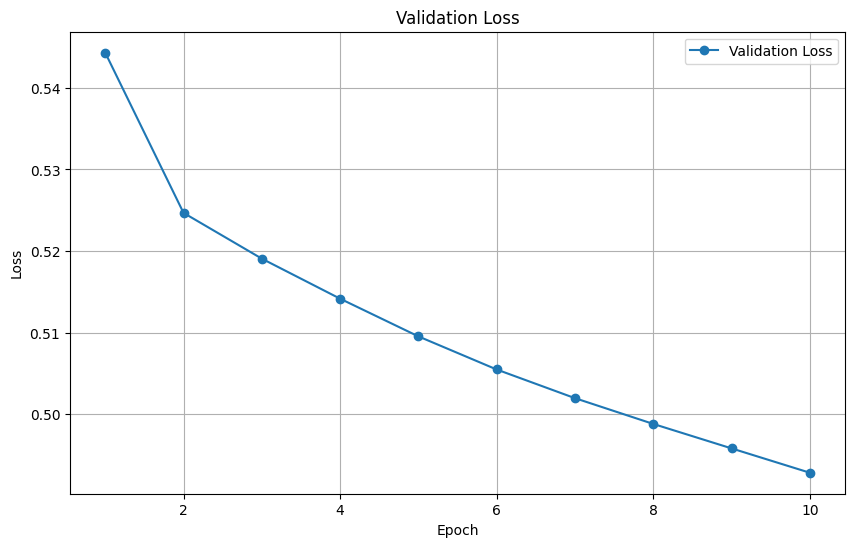

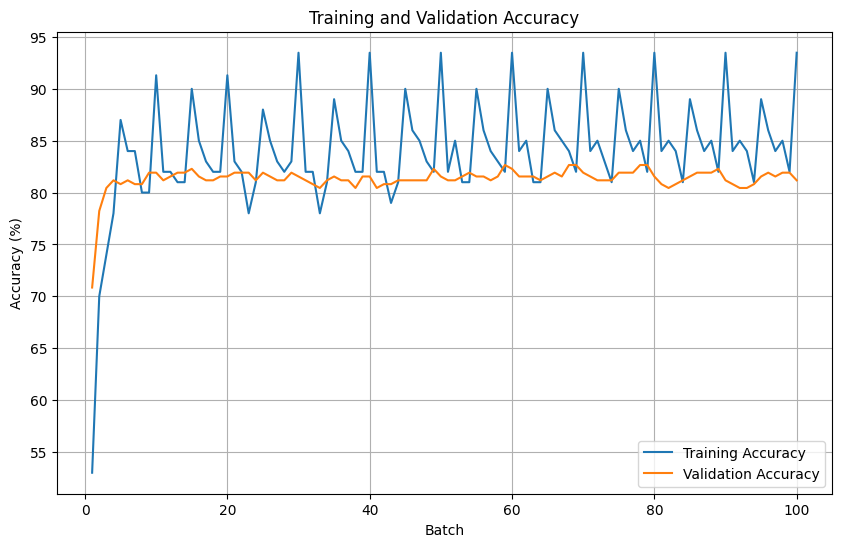

Testing Accuracy: 86.76%


In [ ]:
# Task 3
#Building, training and updating NN.
#Building and training a neural network on training data, then test the output network’s accuracy on validation data
#Then pass the final optimised network to testing data and measure its accuracy


# Set a fixed random seed for consistent results
np.random.seed(42)

# --- Data Preprocessing ---

# Map labels: -1, 0, 1 to 0, 1, 2 for multi-class classification
label_mapping = {-1: 0, 0: 1, 1: 2}
y_mapped = np.vectorize(label_mapping.get)(y.flatten())

# Feature scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into  (70% training),  (20% validation),  (10% testing)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_scaled, y_mapped, test_size=0.1, random_state=42, stratify=y_mapped)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=2/9, random_state=42, stratify=y_train_val)


# === Perceptron ===
class Perceptron:
    def __init__(self, features):
        self.weights = np.random.randn(features) * np.sqrt(1.0 / features)
        self.bias = np.zeros((1,))  # Initialize biases to zero

    def activate(self, z):
        return np.tanh(z)

    def forward(self, inputs):
        total = np.dot(inputs, self.weights) + self.bias
        return self.activate(total)

# === Layer ===
class Layer:
    def __init__(self, numPerceptrons, features):
        self.perceptrons = [Perceptron(features) for _ in range(numPerceptrons)]

    def forward(self, inputs):
        return np.array([percep.forward(inputs) for percep in self.perceptrons])

# === Helper Functions ===
def createBatches(X, y, size=100):
    batches = []
    n_samples = X.shape[0]
    indices = np.arange(n_samples)
    for start_idx in range(0, n_samples, size):
        batch_indices = indices[start_idx:start_idx + size]
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        batches.append((X_batch, y_batch))
    return batches

def test_NN(labeled_input, Weights_Matrix):
    X = labeled_input[:, :-1]
    y_true = labeled_input[:, -1].astype(int)
    #activation for output layer
    a_output = forward_pass(X, Weights_Matrix)
    # Compute cross-entropy loss
    y_one_hot = one_hot_encode(y_true, num_classes=3)
    error_vector = -np.sum(y_one_hot * np.log(a_output + 1e-8), axis=1)
    aggregated_error = np.mean(error_vector)
    return error_vector, aggregated_error

def softmax(z): #Activation function for output layer
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def tanh_derivative(a):  # used for backpropagation
    return 1 - np.power(a, 2)

def one_hot_encode(y, num_classes): # converts each class label into a binary vector used for crossentropy
    one_hot = np.zeros((y.size, num_classes))
    one_hot[np.arange(y.size), y] = 1
    return one_hot

def forward_pass(X, Weights_Matrix):
    z_hidden = np.dot(X, Weights_Matrix[0]) + Weights_Matrix[1]
    a_hidden = np.tanh(z_hidden)
    z_output = np.dot(a_hidden, Weights_Matrix[2]) + Weights_Matrix[3]
    a_output = softmax(z_output)
    return a_output

def train_NN(Labeled_Input_Matrix, Weights_Matrix, BatchSize):
    data = np.array(Labeled_Input_Matrix)
    X = data[:, :-1]
    y = data[:, -1].astype(int)
    batch_training_accuracies = []
    batch_validation_accuracies = []
    learning_rate = 0.5
    batches = createBatches(X, y, size=BatchSize)

    for X_batch, y_batch in batches:
        batch_size = X_batch.shape[0]
        # Forward pass
        z_hidden = np.dot(X_batch, Weights_Matrix[0]) + Weights_Matrix[1]
        a_hidden = np.tanh(z_hidden)
        z_output = np.dot(a_hidden, Weights_Matrix[2]) + Weights_Matrix[3]
        a_output = softmax(z_output)

        # Compute loss (cross-entropy)
        y_one_hot = one_hot_encode(y_batch, num_classes=3)

        # Backward pass
        dz_output = a_output - y_one_hot
        dW_output = np.dot(a_hidden.T, dz_output) / batch_size
        db_output = np.sum(dz_output, axis=0, keepdims=True) / batch_size

        dz_hidden = np.dot(dz_output, Weights_Matrix[2].T) * tanh_derivative(a_hidden)
        dW_hidden = np.dot(X_batch.T, dz_hidden) / batch_size
        db_hidden = np.sum(dz_hidden, axis=0, keepdims=True) / batch_size

        # Update weights
        Weights_Matrix[2] -= learning_rate * dW_output
        Weights_Matrix[3] -= learning_rate * db_output
        Weights_Matrix[0] -= learning_rate * dW_hidden
        Weights_Matrix[1] -= learning_rate * db_hidden

        # Calculate batch training accuracy
        batch_predictions = np.argmax(a_output, axis=1)
        batch_accuracy = np.mean(batch_predictions == y_batch) * 100
        batch_training_accuracies.append(batch_accuracy)

        # Calculate batch validation accuracy
        a_output_val = forward_pass(X_val, Weights_Matrix)
        val_predictions = np.argmax(a_output_val, axis=1)
        val_accuracy = np.mean(val_predictions == y_val) * 100
        batch_validation_accuracies.append(val_accuracy)

    return Weights_Matrix, batch_training_accuracies, batch_validation_accuracies

# === Neural Network ===
class NeuralNetwork:
    def __init__(self, features, hiddenLayerSize, outputSize):
        self.features = features
        self.hiddenLayerSize = hiddenLayerSize
        self.outputSize = outputSize
        self.hidden_layer = Layer(hiddenLayerSize, features)
        self.output_layer = Layer(outputSize, hiddenLayerSize)

    def forward(self, X):
        a_hidden = self.hidden_layer.forward(X)
        z_output = np.dot(a_hidden, np.array([p.weights for p in self.output_layer.perceptrons]).T) + \
                   np.array([p.bias for p in self.output_layer.perceptrons])
        a_output = softmax(z_output)
        return a_output

    def predict(self, output):
        # Predict function for multi-class classification
        return np.argmax(output, axis=1)

    def train_backprop(self, X_train, y_train, X_val, y_val, epochs, batchSize):
        valLosses = []
        training_accuracies = []
        validation_accuracies = []

        # Initialize Weights_Matrix
        Weights_Matrix = [
            np.array([p.weights for p in self.hidden_layer.perceptrons]).T,
            np.array([p.bias for p in self.hidden_layer.perceptrons]).reshape(1, -1),
            np.array([p.weights for p in self.output_layer.perceptrons]).T,
            np.array([p.bias for p in self.output_layer.perceptrons]).reshape(1, -1)
        ]

        for epoch in range(epochs):

            Labeled_Input_Matrix = np.hstack((X_train, y_train.reshape(-1, 1)))


            Weights_Matrix, epoch_batch_accuracies, epoch_batch_validations = train_NN(Labeled_Input_Matrix, Weights_Matrix, batchSize)
            # Training Accuracy
            training_accuracies.extend(epoch_batch_accuracies)

            # Validation Accuracy
            validation_accuracies.extend(epoch_batch_validations)

            # Validation Loss
            Labeled_Input_Matrix_val = np.hstack((X_val, y_val.reshape(-1, 1)))
            _, val_loss = test_NN(Labeled_Input_Matrix_val, Weights_Matrix)
            valLosses.append(val_loss)

            print(f"Epoch {epoch+1}/{epochs}, Last Batch Validation Accuracy: {epoch_batch_validations[-1]:.2f}%")

        return valLosses, training_accuracies, validation_accuracies, Weights_Matrix

# === Training and Testing ===

nn = NeuralNetwork(features=X_scaled.shape[1], hiddenLayerSize=10, outputSize=3)
valLoss, training_accuracies, validation_accuracies, final_weights = nn.train_backprop(
    X_train, y_train, X_val, y_val, epochs=10, batchSize=100)

# Compute test loss and accuracy
a_output_test = forward_pass(X_test, final_weights)
test_predictions = nn.predict(a_output_test)
testing_accuracy = np.mean(test_predictions == y_test) * 100

# === Plot Results ===

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(valLoss) + 1), valLoss, label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(training_accuracies) + 1), training_accuracies, label='Training Accuracy')
plt.plot(range(1, len(validation_accuracies) + 1), validation_accuracies, label='Validation Accuracy')
plt.xlabel('Batch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

print(f"Testing Accuracy: {testing_accuracy:.2f}%")
